# Visualizing Analysis Results

In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('../.'))
import os.path as op
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn import metrics
import scikitplot as skplt
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
import seaborn as sns
import scienceplots 
plt.style.use("science")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_formats = ['svg']

import utils

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.rcParams["font.size"] = 16

## TOC:
1. [Space-time receptive fields](#first-bullet)
2. [Autocorrelation](#second-bullet)
3. [MNIST motion clustering](#third-bullet)
4. [Postdiction](#forth-bullet)
5. [Cue-triggered recall with memory](#fifth-bullet)
6. [Performance vs. $K$](#sixth-bullet)
7. [Recall multiple seqeunces](#seventh-bullet)

## Space-Time Receptive Fields <a class="anchor" id="first-bullet"></a>

In [ ]:
STA = np.load("results/strf/STRF_final.npy")
STA_avg = STA.mean(axis=2)
U = np.load("results/strf/RF.npy").T

In [ ]:
fig, ax = utils.plot_spatial_rf(U[:64], size=(4.5,4.5))
plt.savefig("figures/RF.pdf", bbox_inches="tight")

In [ ]:
strf_list = [12, 28, 85, 18]

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=9, 
    gridspec_kw={
        'width_ratios':[1, 1, 1, 1, 1, 1, 1, 1, 16/7],
    }, figsize=[9, 4.5])
for i, n_idx in enumerate(strf_list):
    c = 0
    stim_i = STA_avg[:, :, n_idx]
    stim_i = (stim_i - stim_i[3:].min()) / (stim_i[3:].max() - stim_i[3:].min())
    axes[i, 0].imshow(U[n_idx].reshape(16, 16), cmap='gray')
    if i == 0:
        axes[i, 0].set_title("Spatial", )
    axes[i, 0].set_ylabel(f"$\#{n_idx+1}$", )
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])
    for t in range(1, 8):
        axes[i, t].imshow(stim_i[2+t].reshape(16, 16), cmap='gray')
        if i == 0:
            axes[i, t].set_title(f"$t$ - {7-t+1}", )
        axes[i, t].set_xticks([])
        axes[i, t].set_yticks([])
    xt = stim_i[3:]
    for t in range(7):
        xt[t] = (xt[t] - xt[t].mean()) / xt[t].std()
    xt = xt.reshape(7, 16, 16)
    if i % 2 == 0:
        xt_a = xt.mean(axis=1) # average over vertical(y)
    else:
        xt_a = xt.mean(axis=2) # average over horizontal(x)

    axes[i, 8].imshow(xt_a, cmap='gray')
    axes[i, 8].set_yticks([0, 6])
    axes[i, 8].set_yticklabels([r"$t-7$", r"$t-1$"])
    axes[i, 8].set_yticklabels([r"$t-7$", r"$t-1$"])
    axes[i, 8].yaxis.tick_right()
    axes[i, 8].tick_params(axis='both', which='minor', left=False, right=False)
    if i % 2 == 0:
        axes[i, 8].set_title(r"$X - T$", )
    else:
        axes[i, 8].set_title(r"$Y - T$", )
    axes[i, 8].set_xticks([])
#plt.subplots_adjust(hspace=1)

fig.savefig("figures/strf.pdf", bbox_inches='tight')

In [3]:
# natural video example
result_dict = np.load("results/inf_example/result_dict_forest.npz")
I_bar = result_dict["I_bar"]
I_hat = result_dict["I_hat"]
I = result_dict["I"]

In [4]:
b = 156
I_b = I[b]
I_bar_b = I_bar[b]
I_hat_b = I_hat[b]
I_err_b = (I_b - I_bar_b)
I_err_b = (I_err_b - I_err_b.min()) / (I_err_b.max() - I_err_b.min())

/tmp/ipykernel_69456/664165531.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


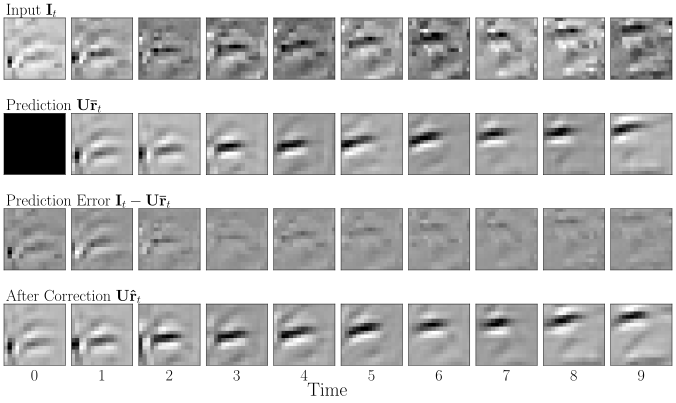

In [7]:
fig = plt.figure(figsize=[12, 6.5])
T = I_hat.shape[1]
N = 16
grid = plt.GridSpec(4, T, wspace=0.1, hspace=0.3)
for t in range(T):
    ax = fig.add_subplot(grid[0, t])
    ax.imshow(I_b[t].reshape(N, N), "gray")
    ax.set_xticks([])
    ax.set_yticks([]) 
    if t == 0:
        ax.text(0, -0.55, r"Input $\mathbf{I}_t$",  ha='left', va='bottom')
        
    ax = fig.add_subplot(grid[1, t])
    ax.imshow(I_bar_b[t].reshape(N, N), "gray")
    ax.set_xticks([])
    ax.set_yticks([])  
    if t == 0:
        ax.text(0, -0.55, r"Prediction $\mathbf{U}\mathbf{\bar{r}}_t$",  ha='left', va='bottom')

    ax = fig.add_subplot(grid[2, t])
    ax.imshow(I_err_b[t].reshape(N, N), "gray", vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    if t == 0:
        ax.text(0, -0.55, r"Prediction Error $\mathbf{I}_t - \mathbf{U}\mathbf{\bar{r}}_t$",  ha='left', va='bottom')
        
    ax = fig.add_subplot(grid[3, t])
    ax.imshow(I_hat_b[t].reshape(N, N), "gray")
    ax.set_xticks([])
    ax.set_yticks([])
    if t == 0:
        ax.text(0, -0.55, r"After Correction $\mathbf{U}\mathbf{\hat{r}}_t$",  ha='left', va='bottom')
    ax.set_xlabel(f"{t}")
fig.supxlabel('Time', y=0.05)        
plt.tight_layout()

plt.savefig("figures/forest_inf.pdf", bbox_inches='tight')

In [8]:
### NORMALIZE
Rb = result_dict["R_hat"][b,:,:]
Rb = (Rb - Rb.min()) / (Rb.max() - Rb.min())
Rh = result_dict["R2_hat"][b]
Rh = (Rh - Rh.min()) / (Rh.max() - Rh.min())
w = result_dict["W"][b,:,:]
w = (w - w.min()) / (w.max() - w.min())

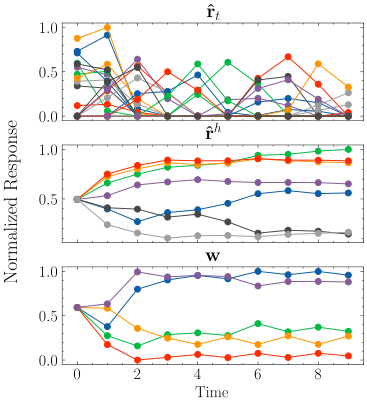

In [21]:
### PLOT
fig, axes = plt.subplots(3, 1, sharex=True, sharey=False, figsize=[5, 6])
ax_r = axes[0]
R_argmax = Rb.mean(axis=0).argsort()[::-1]
for i in R_argmax[:20]:
    ax_r.plot(Rb[:, i], marker='o')  
ax_r.set_xlim(-0.5, T - 0.5)
ax_r.set_title(r"$\mathbf{\hat{r}}_t$")

ax_r2 = axes[1]
for i in np.random.choice(range(Rh.shape[1]), 7, replace=False):
    ax_r2.plot(Rh[:, i], marker='o')  
ax_r2.set_xlim(-0.5, T - 0.5)
ax_r2.set_title(r"$\mathbf{\hat{r}}^h$") 

ax_rs = axes[2]
for i in range(w.shape[1]):
    ax_rs.plot(w[:, i], marker='o')  
ax_rs.set_xlim(-0.5, T - 0.5)
ax_rs.set_title(r"$\mathbf{w}$") 
ax_rs.set_xlabel("Time")

plt.tight_layout()
fig.supylabel("Normalized Response", x=-0.05)
plt.subplots_adjust(hspace=0.25)
plt.savefig("figures/forest_activation.pdf", bbox_inches='tight')

## Autocorrelation timescales <a class="anchor" id="second-bullet"></a>

In [47]:
R = np.load("results/autocorr/r_dict_white.npz")
Rh = np.load("results/autocorr/rh_dict_white.npz")
R_nat = np.load("results/autocorr/r_dict_nat.npz")
Rh_nat = np.load("results/autocorr/rh_dict_nat.npz")

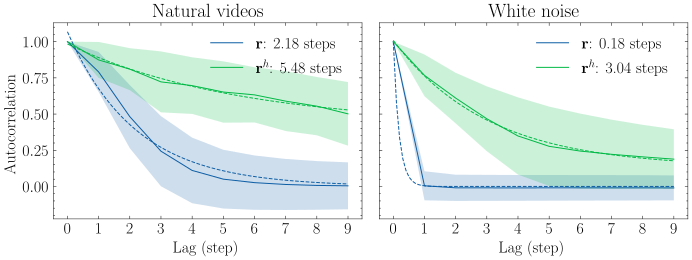

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)
# get color
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

axes[0].plot(np.arange(10), R_nat["mean"], color=colors[0], label=r"$\mathbf{r}$: "+f"{1 / R_nat['params'][1]:.2f} steps")
axes[0].fill_between(np.arange(10), R_nat["mean"] - R_nat["std"], R_nat["mean"] + R_nat["std"], alpha=0.2)
axes[0].plot(np.linspace(0, 9, 90), R_nat["rhat"][:90], linestyle="--")

axes[0].plot(np.arange(10), Rh_nat["mean"], color=colors[1], label=r"$\mathbf{r}^h$: "+f"{1 / Rh_nat['params'][1]:.2f} steps")
axes[0].fill_between(np.arange(10), Rh_nat["mean"] - Rh_nat["std"], Rh_nat["mean"] + Rh_nat["std"], alpha=0.2)
axes[0].plot(np.linspace(0, 9, 90), Rh_nat["rhat"][:90], linestyle="--")
axes[0].legend()
axes[0].set_xticks(np.arange(0, 10, 2))
axes[0].set_xlabel("Lag (step)")
axes[0].set_ylabel("Autocorrelation")
axes[0].set_title("Natural videos")
axes[0].set_xticks(np.arange(10))
axes[0].set_xticklabels(np.arange(10))

axes[1].plot(np.arange(10), R["mean"], color=colors[0], label=r"$\mathbf{r}$: "+f"{1 / R['params'][1]:.2f} steps")
axes[1].fill_between(np.arange(10), R["mean"] - R["std"], R["mean"] + R["std"], alpha=0.2)
axes[1].plot(np.linspace(0, 9, 90), R["rhat"][:90], linestyle="--")

axes[1].plot(np.arange(10), Rh["mean"], color=colors[1], label=r"$\mathbf{r}^h$: "+f"{1 / Rh['params'][1]:.2f} steps")
axes[1].fill_between(np.arange(10), Rh["mean"] - Rh["std"], Rh["mean"] + Rh["std"], alpha=0.2)
axes[1].plot(np.linspace(0, 9, 90), Rh["rhat"][:90], linestyle="--")
axes[1].legend()
axes[1].set_xlabel("Lag (step)")
axes[1].set_title("White noise")

for ax in axes:
    ax.tick_params(axis='x', which='minor', bottom=False, top=False)

plt.tight_layout()

In [ ]:
fig.savefig("figures/autocorr.pdf", bbox_inches='tight')

## MNIST motion clustering <a class="anchor" id="third-bullet"></a>

In [5]:
result_dict = np.load("results/inf_example/result_dict_mnist.npz")

In [6]:
I_bar = result_dict["I_bar"]
I_hat = result_dict["I_hat"]
I = result_dict["I"]
b = 10
I_b = I[b]
I_bar_b = I_bar[b]
I_hat_b = I_hat[b]
I_err_b = (I_b - I_bar_b)
I_err_b = (I_err_b - I_err_b.min()) / (I_err_b.max() - I_err_b.min())

/tmp/ipykernel_18425/2318569636.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


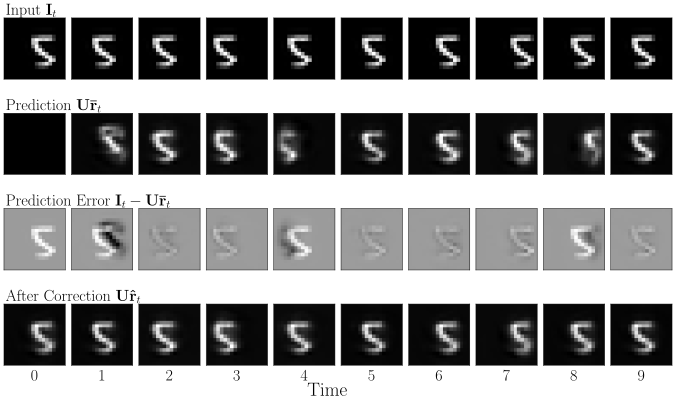

In [7]:
fig = plt.figure(figsize=[12, 6.5])
T = I_hat.shape[1]
N = 18
grid = plt.GridSpec(4, T, wspace=0.1, hspace=0.3)
for t in range(T):
    ax = fig.add_subplot(grid[0, t])
    ax.imshow(I_b[t].reshape(N, N), "gray")
    ax.set_xticks([])
    ax.set_yticks([]) 
    if t == 0:
        ax.text(0, -0.55, r"Input $\mathbf{I}_t$",  ha='left', va='bottom')
        
    ax = fig.add_subplot(grid[1, t])
    ax.imshow(I_bar_b[t].reshape(N, N), "gray")
    ax.set_xticks([])
    ax.set_yticks([])  
    if t == 0:
        ax.text(0, -0.55, r"Prediction $\mathbf{U}\mathbf{\bar{r}}_t$",  ha='left', va='bottom')

    ax = fig.add_subplot(grid[2, t])
    ax.imshow(I_err_b[t].reshape(N, N), "gray", vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    if t == 0:
        ax.text(0, -0.55, r"Prediction Error $\mathbf{I}_t - \mathbf{U}\mathbf{\bar{r}}_t$",  ha='left', va='bottom')
        
    ax = fig.add_subplot(grid[3, t])
    ax.imshow(I_hat_b[t].reshape(N, N), "gray")
    ax.set_xticks([])
    ax.set_yticks([])
    if t == 0:
        ax.text(0, -0.55, r"After Correction $\mathbf{U}\mathbf{\hat{r}}_t$",  ha='left', va='bottom')
    ax.set_xlabel(f"{t}")
fig.supxlabel('Time', y=0.05)        
plt.tight_layout()

#plt.savefig("figures/mnist_inf.pdf", bbox_inches='tight')

In [8]:
### NORMALIZE
Rb = result_dict["R_hat"][b,:,:]
Rb = (Rb - Rb.min()) / (Rb.max() - Rb.min())
Rh = result_dict["R2_hat"][b]
Rh = (Rh - Rh.min()) / (Rh.max() - Rh.min())
w = result_dict["W"][b,:,:]
w = (w - w.min()) / (w.max() - w.min())

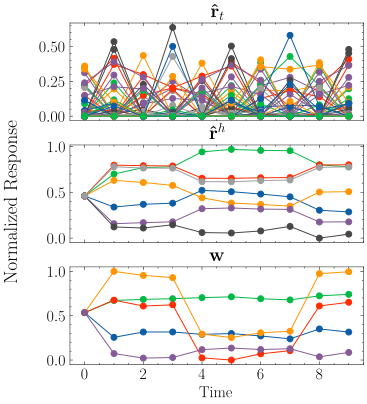

In [7]:
### PLOT
fig, axes = plt.subplots(3, 1, sharex=True, sharey=False, figsize=[5, 6])
ax_r = axes[0]
for i in range(100):
    ax_r.plot(Rb[:, i], marker='o')  
ax_r.set_xlim(-0.5, T - 0.5)
ax_r.set_title(r"$\mathbf{\hat{r}}_t$")

ax_r2 = axes[1]
for i in range(7):
    ax_r2.plot(Rh[:, i], marker='o')  
ax_r2.set_xlim(-0.5, T - 0.5)
ax_r2.set_title(r"$\mathbf{\hat{r}}^h$") 

ax_rs = axes[2]
for i in range(w.shape[1]):
    ax_rs.plot(w[:, i], marker='o')  
ax_rs.set_xlim(-0.5, T - 0.5)
ax_rs.set_title(r"$\mathbf{w}$") 
ax_rs.set_xlabel("Time")

plt.tight_layout()
fig.supylabel("Normalized Response", x=-0.05)
plt.subplots_adjust(hspace=0.25)
#plt.savefig("figures/mnist_activation.pdf", bbox_inches='tight')

In [9]:
R = np.load("results/mnist/R.npy")
R2 = np.load("results/mnist/R2.npy")
W = np.load("results/mnist/W.npy")
# label
M = np.load("../data/mnist_long/motion_test.npy")
D = np.load("../data/mnist_long/digit_test.npy")
D = np.tile(D, (9, 1)).T
# exclude first step
# exclude the beginning
R = R[:, 1:, :]
R2 = R2[:, 1:, :]
W = W[:, 1:]
M = M[:, 1:]

In [10]:
# concatenate time
R_time_cat = R.reshape((-1, R.shape[2]))
R2_time_cat = R2.reshape((-1, R2.shape[2]))
W_time_cat = W.reshape((-1, W.shape[2]))
M_time_cat = M.reshape((-1,))
D_time_cat = D.reshape((-1,))
# demean for PCA
R2_demean = R2_time_cat - R2_time_cat.mean(0)
W_demean = W_time_cat - W_time_cat.mean(0)

In [11]:
pca = PCA(n_components=2)
pca.fit(R2_demean)
R2_proj = pca.transform(R2_demean) # two dim for visualization

In [12]:
motion_map = {0.:"Up", 1.:"Left", 2.:"Down", 3.:"Right"}
df = pd.DataFrame({
    "PC1": R2_proj[:, 0],
    "PC2": R2_proj[:, 1],
    "Direction": [motion_map[i] for i in M_time_cat],
    "Digit": [int(i) for i in D_time_cat]
})

In [13]:
#lr_motion = LogisticRegression(max_iter=500)
#lr_digit = LogisticRegression(max_iter=500)
lr_motion_r = SVC()
lr_digit_r = SVC()
lr_motion_r2 = SVC()
lr_digit_r2 = SVC()

cv_motion_r = cross_validate(lr_motion_r, R_time_cat, M_time_cat, cv=10)
cv_digit_r = cross_validate(lr_digit_r, R_time_cat, D_time_cat, cv=10)
cv_motion_r2 = cross_validate(lr_motion_r2, R2_time_cat, M_time_cat, cv=10)
cv_digit_r2 = cross_validate(lr_digit_r2, R2_time_cat, D_time_cat, cv=10)

In [14]:
# compute chance
motion_chance = np.where(M_time_cat == np.argmax(np.bincount(M_time_cat.astype(int))))[0].shape[0] / M_time_cat.shape[0]
digit_chance = np.where(D_time_cat == np.argmax(np.bincount(D_time_cat.astype(int))))[0].shape[0] / D_time_cat.shape[0]

In [15]:
motion_mean_r = cv_motion_r["test_score"].mean()
motion_std_r = cv_motion_r["test_score"].std()
digit_mean_r = cv_digit_r["test_score"].mean()
digit_std_r = cv_digit_r["test_score"].std()
motion_mean_r2 = cv_motion_r2["test_score"].mean()
motion_std_r2 = cv_motion_r2["test_score"].std()
digit_mean_r2 = cv_digit_r2["test_score"].mean()
digit_std_r2 = cv_digit_r2["test_score"].std()

In [16]:
print(motion_mean_r)
print(digit_mean_r)
print(motion_mean_r2)
print(digit_mean_r2)

0.4645555555555555
0.7614444444444445
0.7394444444444443
0.20933333333333332


In [17]:
print(motion_chance)
print(digit_chance)

0.25955555555555554
0.119


In [33]:
# statistical testing 
from scipy.stats import ttest_1samp, ttest_ind

print(ttest_ind(cv_motion_r2["test_score"], cv_motion_r["test_score"], alternative="greater"))
print(ttest_ind(cv_digit_r["test_score"], cv_digit_r2["test_score"], alternative="greater"))

Ttest_indResult(statistic=53.57204250976748, pvalue=1.3200595582645969e-21)
Ttest_indResult(statistic=45.605072425268, pvalue=2.3467248347022192e-20)


In [ ]:
performance_mean = {
    "r": (motion_mean_r, digit_mean_r),
    "r2": (motion_mean_r2, digit_mean_r2),
    "chance": (motion_chance, digit_chance)
}

performance_std = {
    "r": (motion_std_r, digit_std_r),
    "r2": (motion_std_r2, digit_std_r2),
    "chance": (0, 0)
}

In [ ]:
group_names = ["Motion", "Digit"]
latex_str = [r'$\mathbf{r}$', r'$\mathbf{r}^h$', 'Chance']


x = np.arange(len(group_names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(4, 4))

for attribute, measurement in performance_mean.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=latex_str[multiplier], yerr=performance_std[attribute])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Decoding Accuracy")
ax.set_xticks(x + width, group_names)
ax.xaxis.set_ticks_position('none')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

fig.savefig("figures/mnist_accuracy.pdf", bbox_inches='tight')

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[12, 4], sharey=True, sharex=True)

sns.scatterplot(x='PC1', y='PC2', hue="Direction", ax=axes[0], data=df, s=35, hue_order=["Up", "Left", "Down", "Right"])
axes[0].set_ylabel("PC2", labelpad=-12.5)
axes[0].legend(bbox_to_anchor=(0.95, 1.0))


sns.scatterplot(x='PC1', y='PC2', hue="Digit", ax=axes[1], data=df, s=35, palette="Paired")


axes[1].legend(bbox_to_anchor=(0.95, 1.0))

fig.subplots_adjust(wspace=0.35)
plt.savefig("figures/clustering.pdf", bbox_inches='tight')

## Postdiction <a class="anchor" id="forth-bullet"></a>

### Flash lag

In [103]:
cont_cont_diff = np.load("results/interference/continuous_continuous_T-1_diff.npy")
cont_reversal_diff = np.load("results/interference/continuous_reversal_T-1_diff.npy")
cont_terminate_diff = np.load("results/interference/continuous_terminate_T-1_diff.npy")
cont_stopped_diff = np.load("results/interference/continuous_stopped_T-1_diff.npy")

In [104]:
cold_cont_diff = np.load("results/interference/cold_continuous_T-1_diff.npy")
cold_reversal_diff = np.load("results/interference/cold_reversal_T-1_diff.npy")
cold_stopped_diff = np.load("results/interference/cold_stopped_T-1_diff.npy")
flash = np.load("results/interference/cold_terminate_T-1_diff.npy")

In [105]:
flash_mean = flash[:,-1].mean()

cont_cont_diff = cont_cont_diff[:,-1] - flash_mean
cont_reversal_diff = cont_reversal_diff[:,-1] - flash_mean
cont_stopped_diff = cont_stopped_diff[:,-1] - flash_mean
cont_terminate_diff = cont_terminate_diff[:,-1] - flash_mean

cold_cont_diff = cold_cont_diff[:,-1] - flash_mean
cold_reversal_diff = cold_reversal_diff[:,-1] - flash_mean
cold_stopped_diff = cold_stopped_diff[:,-1] - flash_mean

In [109]:
# statistical testing
from scipy.stats import f_oneway
from scipy.stats import ttest_ind, ttest_rel
# ANOVA for three cases
print(f_oneway(cont_cont_diff, cont_reversal_diff, cont_stopped_diff))
print(f_oneway(cold_cont_diff, cold_reversal_diff, cold_stopped_diff))
# stop vs. terminate
print(ttest_ind(cont_terminate_diff, cont_stopped_diff, equal_var=False))

F_onewayResult(statistic=8963.85124738098, pvalue=0.0)
F_onewayResult(statistic=16402.929603744356, pvalue=0.0)
Ttest_indResult(statistic=2.5785625564485293, pvalue=0.01051339177923554)


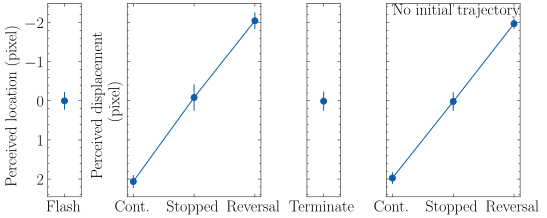

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=[8.5, 3.5], gridspec_kw={'width_ratios':[1, 4, 1, 4]})

x = np.arange(1, 2)
y = [flash_mean]
e = [flash[:,-1].std()]
axes[0].errorbar(x, y, e, marker='o')
axes[0].set_xticks(x)
axes[0].set_xticklabels(["Flash"])
axes[0].set_ylabel("Perceived location (pixel)")

x = np.arange(1,4)
y = [cont_cont_diff.mean(), cont_stopped_diff.mean(), cont_reversal_diff.mean()]
e = [cont_cont_diff.std(), cont_stopped_diff.std(), cont_reversal_diff.std()]

axes[1].errorbar(x, y, e, marker='o')
axes[1].set_xticks(x)
axes[1].set_xticklabels(["Cont.", "Stopped", "Reversal"])
axes[1].set_ylabel("Perceived displacement \n (pixel)")
#axes[1].set_xlim([0.75, 3.25])

x = np.arange(1,2)
y = [cont_terminate_diff.mean()]
e = [cont_terminate_diff.std()]

axes[2].errorbar(x, y, e, marker='o')
axes[2].set_xticks(x)
axes[2].set_xticklabels(["Terminate"])
#axes[1].set_xlim([0.75, 3.25])

x = np.arange(1,4)
y = [cold_cont_diff.mean(), cold_stopped_diff.mean(), cold_reversal_diff.mean()]
e = [cold_cont_diff.std(), cold_stopped_diff.std(), cold_reversal_diff.std()]

axes[3].errorbar(x, y, e, marker='o')
axes[3].set_xticks(x)
axes[3].set_xticklabels(["Cont.", "Stopped", "Reversal"])
axes[3].text(1, -2.2, "No initial trajectory")

for ax in axes: ax.tick_params(axis='x', which='minor', bottom=False, top=False)
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.55)

fig.savefig("figures/flash_lag.pdf", bbox_inches='tight')

### Interpolation

In [94]:
cont_reversal_diff = np.load("results/interference/continuous_reversal_T-1_diff.npy")

In [100]:
print(np.var(cont_reversal_diff[:, int(0.75 * cont_reversal_diff.shape[1])]))
print(np.var(cont_reversal_diff[:, int(0.25 * cont_reversal_diff.shape[1])]))

0.10524409454829717
0.9442799406802248


In [101]:
print(ttest_ind(cont_reversal_diff[:, int(0.75 * cont_reversal_diff.shape[1])], cont_reversal_diff[:, int(0.25 * cont_reversal_diff.shape[1])], equal_var=False))

Ttest_indResult(statistic=-30.17012423572412, pvalue=1.9253820164302575e-68)


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[9, 2])
sns.kdeplot(cont_reversal_diff[:, int(0.25 * cont_reversal_diff.shape[1])], shade=True, label="short latency", ax=axes[0])
sns.kdeplot(cont_reversal_diff[:, int(0.75 * cont_reversal_diff.shape[1])], shade=True, label="long latency", ax=axes[0])

axes[0].set_xlabel("Perceived location (pixel)")

mean_r_loc = cont_reversal_diff.mean(0) 
std_r_loc = cont_reversal_diff.std(0)
axes[1].plot(np.arange(len(mean_r_loc)), mean_r_loc)
axes[1].fill_between(np.arange(len(mean_r_loc)), mean_r_loc - std_r_loc, mean_r_loc + std_r_loc, alpha=0.2)
axes[1].set_xlabel("Latency")
axes[1].set_ylabel("Perceived location \n (pixel)")

axes[0].legend()
plt.subplots_adjust(wspace=0.5)

fig.savefig("figures/interpolation.pdf", bbox_inches='tight')

## Cue-Triggered Recall <a class="anchor" id="fifth-bullet"></a>

In [ ]:
w_conditioning = np.load("results/recall_multi/trained/w_conditioning.npy")[0]
w_recalled_start = np.load("results/recall_multi/trained/w_recalled_start.npy")[0]
w_recalled_mid = np.load("results/recall_multi/trained/w_recalled_mid.npy")[0]
w_recalled_end = np.load("results/recall_multi/trained/w_recalled_end.npy")[0]

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

labels = [r'$w_1$', r'$w_2$', r'$w_3$', r'$w_4$', r'$w_5$']

x = np.arange(len(labels)) 
width = 0.1

rects1 = ax.bar(x - width*3/2, w_conditioning, width, label='conditioning')
rects2 = ax.bar(x - width/2, w_recalled_start, width, label='start')
rects3 = ax.bar(x + width/2, w_recalled_mid, width, label='middle')
rects4 = ax.bar(x + width*3/2, w_recalled_end, width, label='end')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Modulation (a.u.)")
ax.set_xticks(x, labels)
ax.legend(loc='lower center', prop={'size': 12})
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

fig.tight_layout()

fig.savefig("figures/recalled_dyn.pdf", bbox_inches='tight')

In [ ]:
R_conditioning = np.load("../data/memory/r_full_seq.npy")
# find peak neurons
peak_neurons = []
for t in range(5):
    peak_neurons += list(np.argsort(R_conditioning[t])[::-1][:1])

### 10 steps of training memory

In [ ]:
R_recalled_start = np.load("results/recall/trained/R_recalled_start.npy")
R_recalled_mid = np.load("results/recall/trained/R_recalled_mid.npy")
R_recalled_end = np.load("results/recall/trained/R_recalled_end.npy")

In [ ]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())
# plot sequential firing and correlogram
R_conditioning_norm = normalize(R_conditioning)
R_recalled_start_norm = normalize(R_recalled_start) 
R_recalled_mid_norm = normalize(R_recalled_mid) 
R_recalled_end_norm = normalize(R_recalled_end) 

In [ ]:
I_b = np.load("../data/memory/img_seq.npy")

In [ ]:
fig = plt.figure(figsize=[7.5, 3])
N = 18
grid = plt.GridSpec(1, 5, wspace=0.1, hspace=0.3)
for t in range(5):
    ax = fig.add_subplot(grid[0, t])
    ax.imshow(I_b[t].reshape(N, N), "gray")
    ax.set_xticks([])
    ax.set_yticks([]) 
    ax.set_xlabel(f"{t+1}")
fig.supxlabel('Time', y=0.15)        
plt.tight_layout()
fig.savefig("figures/recall_stim.pdf", bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(7.5, 3))

T = np.arange(5)
axes[0].plot(T, R_conditioning_norm[:,peak_neurons], marker='o')
axes[1].plot(T, R_recalled_start_norm[:,peak_neurons], marker='o')
axes[2].plot(T, R_recalled_mid_norm[:,peak_neurons], marker='o')
axes[3].plot(T, R_recalled_end_norm[:,peak_neurons], marker='o', label=[f'{i+1}' for i in peak_neurons])

axes[0].set_xticks(T)
axes[0].set_xticklabels(T)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Response")

axes[0].set_title("Conditioning")
axes[1].set_title("Start")
axes[2].set_title("Middle")
axes[3].set_title("End")

axes[3].legend(prop={'size': 12})
plt.show()

fig.savefig("figures/recall.pdf", bbox_inches='tight')

### Raw memory

In [ ]:
R_recalled_start_raw = np.load("results/recall/raw/R_recalled_start.npy")
R_recalled_mid_raw = np.load("results/recall/raw/R_recalled_mid.npy")
R_recalled_end_raw = np.load("results/recall/raw/R_recalled_end.npy")

In [ ]:
# plot sequential firing and correlogram
R_recalled_start_norm_raw = normalize(R_recalled_start_raw) 
R_recalled_mid_norm_raw = normalize(R_recalled_mid_raw) 
R_recalled_end_norm_raw = normalize(R_recalled_end_raw) 

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(13, 3))

T = np.arange(5)
axes[0].plot(T, R_conditioning_norm[:,peak_neurons], marker='o')
axes[1].plot(T, R_recalled_start_norm_raw[:,peak_neurons], marker='o')
axes[2].plot(T, R_recalled_mid_norm_raw[:,peak_neurons], marker='o')
axes[3].plot(T, R_recalled_end_norm_raw[:,peak_neurons], marker='o', label=[f'Neuron {i}' for i in peak_neurons])

axes[0].set_xticks(T)
axes[0].set_xticklabels(T)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Response")

axes[0].set_title("Conditioning")
axes[1].set_title("Recall - Start")
axes[2].set_title("Recall - Middle")
axes[3].set_title("Recall - End")

axes[3].legend()
plt.show()

### Correlogram

In [ ]:
xcorr_con_norm = np.load("results/recall/trained/xcorr_con_norm.npy")
xcorr_start_norm = np.load("results/recall/trained/xcorr_start_norm.npy")
xcorr_start_raw_norm = np.load("results/recall/trained/xcorr_start_raw_norm.npy")
xcorr_diff_norm = np.load("results/recall/trained/xcorr_diff_norm.npy")

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True,  figsize=(4, 5.5))       
cbar_ax = fig.add_axes([0.93, 0.125, .03, .755])

sns.heatmap(xcorr_con_norm, cmap='Spectral_r', ax=axes[0], cbar=True, cbar_ax=cbar_ax, linewidths=0.0)
axes[0].set_xticks(np.arange(0.5, 9.5, 1))
axes[0].set_xticklabels(np.arange(-4, 5))
axes[0].set_yticks([])
axes[0].set_title("Conditioning")


sns.heatmap(xcorr_start_raw_norm, cmap='Spectral_r', ax=axes[1], cbar=False, linewidths=0.0)
axes[1].set_xticks(np.arange(0.5, 9.5, 1))
axes[1].set_xticklabels(np.arange(-4, 5))
axes[1].set_yticks([])
axes[1].set_title("Before")

sns.heatmap(xcorr_start_norm, cmap='Spectral_r', ax=axes[2], cbar=False, linewidths=0.0)
axes[2].set_xticks(np.arange(0.5, 9.5, 1))
axes[2].set_xticklabels(np.arange(-4, 5))
axes[2].set_yticks([])
axes[2].set_title("After")
    
sns.heatmap(xcorr_diff_norm, cmap='Spectral_r', ax=axes[3], cbar=False, linewidths=0.0)
axes[3].set_xticks(np.arange(0.5, 9.5, 1))
axes[3].set_xticklabels(np.arange(-4, 5))
axes[3].set_yticks([0.5, 9.5])
axes[3].set_yticklabels(["max", "min"])
axes[3].set_title("After - Before")
axes[3].set_xlabel("Time")

cbar = axes[0].collections[0].colorbar
for i in range(4):
    axes[i].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# here set the labelsize by 20
#fig.supylabel('RF distance (pixel)')
fig.supylabel('RF distance (pixel)')
plt.subplots_adjust(hspace=0.4)

fig.savefig("figures/correlogram.pdf", bbox_inches='tight')

## Model performance as the number of $K$ increases <a class="anchor" id="sixth-bullet"></a>

In [3]:
seeds = [10, 250, 500, 567, 678, 704, 899]

### Natural videos

In [4]:
# load natural video loss data
nat_losses = []
for mix_dim in np.arange(1, 7):
    if mix_dim == 1: 
        nat_fpath = "../experiments/single_forest_seed/"
    elif mix_dim == 5:
        nat_fpath = "../experiments/two_forest_seed/"
    else:
        nat_fpath = f"../experiments/mixture_dim_{mix_dim}/"
    losses = []
    for seed in seeds:
        losses.append(np.load(op.join(nat_fpath, f"seed_{seed}/test_losses.npy")))
    losses = np.asarray(losses)
    nat_losses.append(losses)
nat_losses = np.asarray(nat_losses)

In [5]:
# load mnist loss data
mnist_losses = []
for mix_dim in np.arange(1, 7):
    if mix_dim == 1: 
        nat_fpath = "../experiments/single_mnist_seed/"
    elif mix_dim == 5:
        nat_fpath = "../experiments/two_mnist_seed/"
    else:
        nat_fpath = f"../experiments/mnist_mixture_dim_{mix_dim}/"
    losses = []
    for seed in seeds:
        losses.append(np.load(op.join(nat_fpath, f"seed_{seed}/test_losses.npy")))
    losses = np.asarray(losses)
    mnist_losses.append(losses)
mnist_losses = np.asarray(mnist_losses)

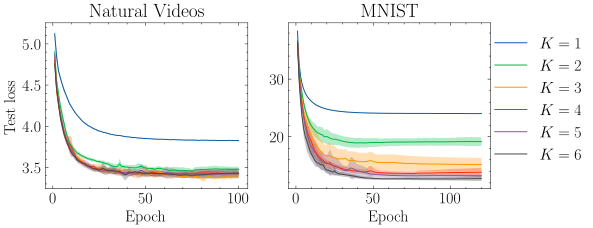

In [21]:
# plot by K
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
for mix_dim in np.arange(1, 7):
    loss_m = nat_losses[mix_dim-1].mean(axis=0)
    loss_std = nat_losses[mix_dim-1].std(axis=0)
    epochs = np.arange(1, loss_m.shape[0]+1)
    axes[0].plot(epochs, loss_m, label=f"$K = {mix_dim}$")
    axes[0].fill_between(epochs, loss_m - loss_std, loss_m + loss_std, alpha=0.3)
#ax.legend(bbox_to_anchor=(0.95, 1.0))
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Test loss")
axes[0].set_title("Natural Videos")

for mix_dim in np.arange(1, 7):
    loss_m = mnist_losses[mix_dim-1].mean(axis=0)
    loss_std = mnist_losses[mix_dim-1].std(axis=0)
    epochs = np.arange(1, loss_m.shape[0]+1)
    axes[1].plot(epochs, loss_m, label=f"$K = {mix_dim}$")
    axes[1].fill_between(epochs, loss_m - loss_std, loss_m + loss_std, alpha=0.3)
axes[1].set_xlabel("Epoch")
axes[1].set_title("MNIST")

plt.legend(bbox_to_anchor=(0.95, 1.0), loc='upper left')

fig.savefig("figures/K_losses.pdf", bbox_inches='tight')

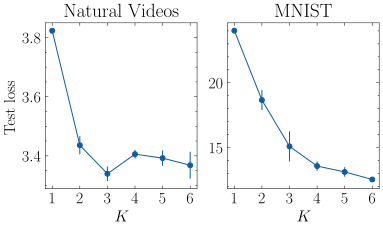

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3), sharex=True)

# plot distribution of best losses
best_losses = np.min(nat_losses, axis=2)
best_mean = np.mean(best_losses, axis=1)
best_std = np.std(best_losses, axis=1)
axes[0].errorbar(np.arange(1,7), best_mean, best_std, fmt='o', linestyle="-", markersize=5)
axes[0].set_xlabel("$K$")
axes[0].set_xticks(np.arange(1,7))

axes[0].tick_params(axis='x', which='minor', bottom=False, top=False)
axes[0].set_ylabel("Test loss")
axes[0].set_title("Natural Videos")

# plot distribution of best losses
best_losses = np.min(mnist_losses, axis=2)
best_mean = np.mean(best_losses, axis=1)
best_std = np.std(best_losses, axis=1)
axes[1].errorbar(np.arange(1,7), best_mean, best_std, fmt='o', linestyle="-", markersize=5)
axes[1].set_xlabel("$K$")
axes[1].set_xticks(np.arange(1,7))
axes[1].tick_params(axis='x', which='minor', bottom=False, top=False)
axes[1].set_title("MNIST")

fig.savefig("figures/K_best_loss.pdf", bbox_inches='tight')

## Recall multiple seqeunces <a class="anchor" id="seventh-bullet"></a> 

In [ ]:
img_seq_recalled = np.load("results/recall_multi/trained/seq_recalled_start.npy")
img_real = np.load("../data/memory_multi/img_seq.npy")

In [ ]:
# plot all seqeunces
for b in range(img_real.shape[0]):
    fig = plt.figure(figsize=[8, 2.5])
    T = img_real.shape[1]
    N = 18
    grid = plt.GridSpec(2, T, wspace=0.1, hspace=0.3)
    for t in range(T):
        ax = fig.add_subplot(grid[0, t])
        ax.imshow(img_real[b, t].reshape(N, N), "gray")
        ax.set_xticks([])
        ax.set_yticks([]) 
        if t == 0:
            ax.text(0, -0.55, r"Original sequence",  ha='left', va='bottom')
            
        ax = fig.add_subplot(grid[1, t])
        ax.imshow(img_seq_recalled[b, t].reshape(N, N), "gray")
        ax.set_xticks([])
        ax.set_yticks([])  
        if t == 0:
            ax.text(0, -0.55, r"Recalled seqeuence",  ha='left', va='bottom')
        ax.set_xlabel(f"{t}")
    fig.supxlabel('Time', y=-0.075)
    plt.tight_layout()
    plt.savefig(f"figures/recall_multi_seq_{b}.pdf", bbox_inches='tight')